# Gradiente Descendente en Optimización

## Parte A: Implementación de Gradiente Descendente en 3-D

Se implementará el métodop de Gradiente Descendiente para minimizar la función de pérdida 
$$
L(x,y) = (x-2)^2 + (y-1)^2
$$
simulando el entrenamiento de una red neuronal con dos parámetros.

### 1. Calcular analíticamente el gradiente de la función de pérdida

Para calcular el gradiente procedemos a calcular la derivada parcial de $L$ con respecto a $x$ y $y$

$$
\frac{\partial}{\partial x}((x-2)^2 + (y-1)^2)
$$
$$
\frac{\partial}{\partial y}((x-2)^2 + (y-1)^2)
$$

Con esto realizamos el calculo de cada derivada parcial y obtenemos que el gradiente de la función de perdida L es:
$$
\nabla L = \left(\begin{matrix}
2x-4 \\
2y-2 \\
\end{matrix}\right)
$$


### 2. Implementar el algoritmo de Gradiente Descendente

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función de pérdida
def L(x, y):
    return (x - 2)**2 + (y + 1)**2

# Definición del gradiente de L (derivadas parciales)
def grad_L(point):
    x, y = point
    grad_x = 2 * (x - 2)   # ∂L/∂x = 2(x - 2)
    grad_y = 2 * (y + 1)   # ∂L/∂y = 2(y + 1)
    return np.array([grad_x, grad_y])

# Implementación del algoritmo de Gradiente Descendente
def gradient_descent(initial_point, alpha=0.1, tol=1e-6, max_iter=1000):
    xk = np.array(initial_point, dtype=float)
    history = [xk.copy()]
    
    for i in range(max_iter):
        grad = grad_L(xk)
        
        if np.linalg.norm(grad) < tol:
            print(f"Convergencia alcanzada en la iteración {i}.")
            break
        # Actualizacion del punto usando la regla: x_{k+1} = x_k - alpha * gradiente
        xk = xk - alpha * grad
        history.append(xk.copy())
    
    return xk, history

# Parámetros iniciales
initial_point = [0, 0]
alpha = 0.1
tol = 1e-6
max_iter = 100

min_point, trajectory = gradient_descent(initial_point, alpha, tol, max_iter)
print("El mínimo aproximado se encontró en:", min_point)

Convergencia alcanzada en la iteración 69.
El mínimo aproximado se encontró en: [ 1.99999959 -0.99999979]


### 3. Experimentar con diferentes valores para el parámetro de paso $\alpha$

In [11]:
# Parámetros iniciales
initial_point = [0, 0]
alpha = 0.2
tol = 1e-6
max_iter = 100

min_point, trajectory = gradient_descent(initial_point, alpha, tol, max_iter)
print("El mínimo aproximado se encontró en:", min_point)

Convergencia alcanzada en la iteración 30.
El mínimo aproximado se encontró en: [ 1.99999956 -0.99999978]


In [7]:
# Parámetros iniciales
initial_point = [0, 0]
alpha = 0.3
tol = 1e-6
max_iter = 100

min_point, trajectory = gradient_descent(initial_point, alpha, tol, max_iter)
print("El mínimo aproximado se encontró en:", min_point)

Convergencia alcanzada en la iteración 17.
El mínimo aproximado se encontró en: [ 1.99999966 -0.99999983]


In [32]:
# Parámetros iniciales
initial_point = [0, 0]
alpha = 0.5
tol = 1e-6
max_iter = 100

min_point, trajectory = gradient_descent(initial_point, alpha, tol, max_iter)
print("El mínimo aproximado se encontró en:", min_point)

Convergencia alcanzada en la iteración 1.
El mínimo aproximado se encontró en: [ 2. -1.]


In [50]:
# Parámetros iniciales
initial_point = [0, 0]
alpha = 0.7
tol = 1e-6
max_iter = 100

min_point, trajectory = gradient_descent(initial_point, alpha, tol, max_iter)
print("El mínimo aproximado se encontró en:", min_point)

Convergencia alcanzada en la iteración 17.
El mínimo aproximado se encontró en: [ 2.00000034 -1.00000017]


Podemos ver que a medida que el $\alpha$ se acerca a 0.5, se haya la convergencia en menor cantidad de iteraciones y la precision con respecto al minimo global que conocemos [2, -1], aumenta. Por ejemplo, con un $\alpha = 0.2$ se encontró un minimo aproximado en [ 1.99999956 -0.99999978], mientras que con un $\alpha = 0.5$ se encontró un minimo aproximado en [ 2. -1.], mostrando una mayor precision en el segundo caso.

### Graficar la trayectoria de los parámetros durante la optimizació

In [48]:
# Parámetros iniciales
initial_point = [0, 0]
alpha = 0.5
tol = 1e-6
max_iter = 100

min_point, trajectory = gradient_descent(initial_point, alpha, tol, max_iter)
print("El mínimo aproximado se encontró en:", min_point)

Convergencia alcanzada en la iteración 1.
El mínimo aproximado se encontró en: [ 2. -1.]


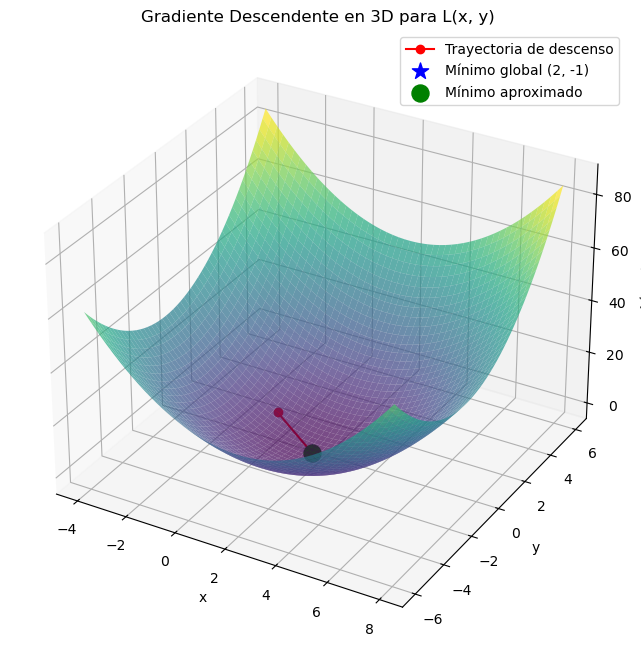

In [49]:
# Convertir la trayectoria a un arreglo para graficar
trajectory = np.array(trajectory)
x_vals = trajectory[:, 0]
y_vals = trajectory[:, 1]
z_vals = L(x_vals, y_vals)  # Evaluar la función en los puntos de la trayectoria

# Crear una malla para graficar la superficie de L(x, y)
x_range = np.linspace(-4, 8, 400)
y_range = np.linspace(-6, 6, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = L(X, Y)

# Graficación 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, edgecolor='none')

# Graficar la trayectoria del gradiente descendente en 3D
ax.plot3D(x_vals, y_vals, z_vals, marker='o', color='red', label='Trayectoria de descenso')

# Marcar el mínimo global conocido (2, -1, L(2,-1)=0)
ax.scatter(2, -1, L(2, -1), color='blue', marker='*', s=150, label='Mínimo global (2, -1)')

# Marcar el mínimo aproximado obtenido por el algoritmo
ax.scatter(min_point[0], min_point[1], L(min_point[0], min_point[1]), color='green', marker='o', s=150, label='Mínimo aproximado')

# Etiquetas y título
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('L(x, y)')
ax.set_title('Gradiente Descendente en 3D para L(x, y)')

# Leyenda
ax.legend()

plt.show()

### 5. Destacar el valor óptimo final y compararlo con la solución analítica

Podemos ver que en ambos casos, se encuentra el mismo minimo global (2,-1). Sin embargo, el metodo del gradiente descendente puede llegar a variar un poco en su precision dependiendo de $\alpha$. Podemos ver que cuando $\alpha \neq 0.5$ lograba encontrar un punto extremadamente cercano al minimo global conocido pero no exactamente el mismo.

### 6. Analizar la sensibilidad del método al valor de α y discutir estrategias para su selección óptima

El metodo del gradiente descendiente tiene una alta sensibilidad al parametro $\alpha$. Como se analizó anteriormente, a medida que este valor se alejaba de 0.5 aumentaban las iteraciones para encontrar el minimo y reducia la precision con respecto al minimo aproximado y al minimo global concido. Para poder encontrar el $\alpha$ optimo se podria realizar un Grid Search para encontrar el mejor $\alpha$ para una funcion determinada. Sin embargo, esto seria poco eficiente y seria más optimo modificar en cada iteracion el $\alpha$, iniciando en valores grandes e ir reduciendo gradualmente hasta encontrar un minimo más preciso y el $\alpha$ optimo.

## Parte B: Comparación entre Newton-Raphson y Gradiente Descendente